In [1]:
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score
from functools import partial
from gnn_sAndp_weekly import startGNN
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from sklearn.model_selection import LeaveOneOut
import optuna

f:\miniconda3\envs\forGNN\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


c:\Users\tony\Desktop\GNN_test\yf_dataset.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yfdata['Signal'].iloc[i] = 0
c:\Users\tony\Desktop\GNN_test\yf_dataset.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yfdata['Signal'].iloc[i] = 2
c:\Users\tony\Desktop\GNN_test\yf_dataset.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yfdata['Signal'].iloc[i] = 0
c:\Users\tony\Desktop\GNN_test\yf_dataset.py:97: SettingWithCopyWar

If there is NAN in data?  False
Index(['2011-01-31 00:00:00 ~ 2011-02-09 00:00:00',
       '2011-02-01 00:00:00 ~ 2011-02-10 00:00:00',
       '2011-02-02 00:00:00 ~ 2011-02-11 00:00:00',
       '2011-02-03 00:00:00 ~ 2011-02-14 00:00:00',
       '2011-02-04 00:00:00 ~ 2011-02-15 00:00:00',
       '2011-02-07 00:00:00 ~ 2011-02-16 00:00:00',
       '2011-02-08 00:00:00 ~ 2011-02-17 00:00:00',
       '2011-02-09 00:00:00 ~ 2011-02-18 00:00:00',
       '2011-02-10 00:00:00 ~ 2011-02-22 00:00:00',
       '2011-02-11 00:00:00 ~ 2011-02-23 00:00:00',
       ...
       '2019-08-08 00:00:00 ~ 2019-08-19 00:00:00',
       '2019-08-09 00:00:00 ~ 2019-08-20 00:00:00',
       '2019-08-12 00:00:00 ~ 2019-08-21 00:00:00',
       '2019-08-13 00:00:00 ~ 2019-08-22 00:00:00',
       '2019-08-14 00:00:00 ~ 2019-08-23 00:00:00',
       '2019-08-15 00:00:00 ~ 2019-08-26 00:00:00',
       '2019-08-16 00:00:00 ~ 2019-08-27 00:00:00',
       '2019-08-19 00:00:00 ~ 2019-08-28 00:00:00',
       '2019-08-20 00

c:\Users\tony\Desktop\GNN_test\yf_dataset.py:193: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  edge_index = torch.tensor([
c:\Users\tony\Desktop\GNN_test\yf_dataset.py:200: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_weights = torch.tensor(edge_weights, dtype=torch.float)


feature_matrix_shape =  torch.Size([2154, 42])
edge size=  torch.Size([2, 34423])
edge_weights size=  torch.Size([34423])
y =  torch.Size([2154, 1])
找到日期 '2013-01-18 00:00:00 ~ 2013-01-30 00:00:00'，index= 495
找到日期 '2017-05-12 00:00:00 ~ 2017-05-23 00:00:00'，index= 1581
找到日期 '2018-03-16 00:00:00 ~ 2018-03-27 00:00:00'，index= 1793
找到日期 '2019-08-20 00:00:00 ~ 2019-08-29 00:00:00'，index= 2152
上漲(0)的数量： 534
持有(1)的数量： 1203
下跌(2)的数量： 417
weight:  [4.033707865093001, 1.7905236907581836, 5.165467625775408]


Epoch 01: 100%|██████████| 1087/1087 [00:04<00:00, 236.68it/s]


TrainAcc: 0.5768, ValAcc: 0.6745, TestAcc: 0.5097, trainLoss: 0.9497, evalLoss: 0.8660, testLoss: 1.0010
Validation loss decreased (inf --> 1.000992).  Saving model ...
[[  0  95   0]
 [  2 181   5]
 [  0  74   2]]


Epoch 02: 100%|██████████| 1087/1087 [00:04<00:00, 244.29it/s]


TrainAcc: 0.5833, ValAcc: 0.6745, TestAcc: 0.5237, trainLoss: 0.9282, evalLoss: 0.8089, testLoss: 1.0070
EarlyStopping counter: 1 out of 15


Epoch 03: 100%|██████████| 1087/1087 [00:04<00:00, 244.83it/s]


TrainAcc: 0.5989, ValAcc: 0.6840, TestAcc: 0.5348, trainLoss: 0.9042, evalLoss: 0.7956, testLoss: 0.9832
Validation loss decreased (1.000992 --> 0.983174).  Saving model ...
[[  8  86   1]
 [  2 183   3]
 [  1  74   1]]


Epoch 04: 100%|██████████| 1087/1087 [00:04<00:00, 238.87it/s]


TrainAcc: 0.6072, ValAcc: 0.6887, TestAcc: 0.5348, trainLoss: 0.8906, evalLoss: 0.7838, testLoss: 0.9774
Validation loss decreased (0.983174 --> 0.977428).  Saving model ...
[[  6  89   0]
 [  2 185   1]
 [  1  74   1]]


Epoch 05: 100%|██████████| 1087/1087 [00:04<00:00, 246.47it/s]


TrainAcc: 0.6145, ValAcc: 0.6887, TestAcc: 0.5404, trainLoss: 0.8750, evalLoss: 0.7757, testLoss: 0.9643
Validation loss decreased (0.977428 --> 0.964323).  Saving model ...
[[  9  86   0]
 [  2 184   2]
 [  2  73   1]]


Epoch 06: 100%|██████████| 1087/1087 [00:04<00:00, 237.70it/s]


TrainAcc: 0.6247, ValAcc: 0.6981, TestAcc: 0.5460, trainLoss: 0.8630, evalLoss: 0.7686, testLoss: 0.9574
Validation loss decreased (0.964323 --> 0.957358).  Saving model ...
[[ 11  84   0]
 [  2 184   2]
 [  2  73   1]]


Epoch 07: 100%|██████████| 1087/1087 [00:04<00:00, 254.26it/s]


TrainAcc: 0.6283, ValAcc: 0.6934, TestAcc: 0.5543, trainLoss: 0.8501, evalLoss: 0.7624, testLoss: 0.9479
Validation loss decreased (0.957358 --> 0.947873).  Saving model ...
[[ 13  82   0]
 [  1 185   2]
 [  3  72   1]]


Epoch 08: 100%|██████████| 1087/1087 [00:04<00:00, 231.33it/s]


TrainAcc: 0.6320, ValAcc: 0.6840, TestAcc: 0.5571, trainLoss: 0.8393, evalLoss: 0.7566, testLoss: 0.9415
Validation loss decreased (0.947873 --> 0.941497).  Saving model ...
[[ 13  82   0]
 [  1 185   2]
 [  3  71   2]]


Epoch 09: 100%|██████████| 1087/1087 [00:04<00:00, 245.25it/s]


TrainAcc: 0.6302, ValAcc: 0.6887, TestAcc: 0.5515, trainLoss: 0.8307, evalLoss: 0.7495, testLoss: 0.9381
Validation loss decreased (0.941497 --> 0.938102).  Saving model ...
[[ 14  81   0]
 [  2 183   3]
 [  4  71   1]]


Epoch 10: 100%|██████████| 1087/1087 [00:04<00:00, 231.80it/s]


TrainAcc: 0.6339, ValAcc: 0.6840, TestAcc: 0.5460, trainLoss: 0.8234, evalLoss: 0.7437, testLoss: 0.9369
Validation loss decreased (0.938102 --> 0.936900).  Saving model ...
[[ 12  83   0]
 [  2 183   3]
 [  3  72   1]]


Epoch 11: 100%|██████████| 1087/1087 [00:04<00:00, 245.59it/s]


TrainAcc: 0.6421, ValAcc: 0.7028, TestAcc: 0.5515, trainLoss: 0.8133, evalLoss: 0.7410, testLoss: 0.9292
Validation loss decreased (0.936900 --> 0.929191).  Saving model ...
[[ 14  81   0]
 [  2 183   3]
 [  4  71   1]]


Epoch 12: 100%|██████████| 1087/1087 [00:04<00:00, 236.15it/s]


TrainAcc: 0.6394, ValAcc: 0.6981, TestAcc: 0.5487, trainLoss: 0.8082, evalLoss: 0.7360, testLoss: 0.9302
EarlyStopping counter: 1 out of 15


Epoch 13: 100%|██████████| 1087/1087 [00:04<00:00, 249.28it/s]


TrainAcc: 0.6486, ValAcc: 0.7028, TestAcc: 0.5682, trainLoss: 0.7992, evalLoss: 0.7337, testLoss: 0.9230
Validation loss decreased (0.929191 --> 0.922956).  Saving model ...
[[ 15  80   0]
 [  2 183   3]
 [  4  66   6]]


Epoch 14: 100%|██████████| 1087/1087 [00:04<00:00, 248.98it/s]


TrainAcc: 0.6458, ValAcc: 0.7028, TestAcc: 0.5627, trainLoss: 0.7930, evalLoss: 0.7313, testLoss: 0.9239
EarlyStopping counter: 1 out of 15


Epoch 15: 100%|██████████| 1087/1087 [00:04<00:00, 247.74it/s]


TrainAcc: 0.6587, ValAcc: 0.7028, TestAcc: 0.5822, trainLoss: 0.7843, evalLoss: 0.7302, testLoss: 0.9147
Validation loss decreased (0.922956 --> 0.914721).  Saving model ...
[[ 20  75   0]
 [  2 183   3]
 [  4  66   6]]


Epoch 16: 100%|██████████| 1087/1087 [00:04<00:00, 253.37it/s]


TrainAcc: 0.6550, ValAcc: 0.7075, TestAcc: 0.5682, trainLoss: 0.7803, evalLoss: 0.7264, testLoss: 0.9206
EarlyStopping counter: 1 out of 15


Epoch 17: 100%|██████████| 1087/1087 [00:04<00:00, 247.23it/s]


TrainAcc: 0.6716, ValAcc: 0.7217, TestAcc: 0.5850, trainLoss: 0.7740, evalLoss: 0.7250, testLoss: 0.9164
EarlyStopping counter: 2 out of 15


Epoch 18: 100%|██████████| 1087/1087 [00:04<00:00, 238.90it/s]


TrainAcc: 0.6670, ValAcc: 0.7170, TestAcc: 0.5766, trainLoss: 0.7689, evalLoss: 0.7222, testLoss: 0.9156
EarlyStopping counter: 3 out of 15


Epoch 19: 100%|██████████| 1087/1087 [00:04<00:00, 239.18it/s]


TrainAcc: 0.6725, ValAcc: 0.7123, TestAcc: 0.5794, trainLoss: 0.7626, evalLoss: 0.7226, testLoss: 0.9111
Validation loss decreased (0.914721 --> 0.911080).  Saving model ...
[[ 21  74   0]
 [  5 179   4]
 [  3  65   8]]


Epoch 20: 100%|██████████| 1087/1087 [00:04<00:00, 240.58it/s]


TrainAcc: 0.6734, ValAcc: 0.7075, TestAcc: 0.5766, trainLoss: 0.7584, evalLoss: 0.7193, testLoss: 0.9129
EarlyStopping counter: 1 out of 15


Epoch 21: 100%|██████████| 1087/1087 [00:04<00:00, 241.29it/s]


TrainAcc: 0.6753, ValAcc: 0.6981, TestAcc: 0.5710, trainLoss: 0.7531, evalLoss: 0.7182, testLoss: 0.9080
Validation loss decreased (0.911080 --> 0.908032).  Saving model ...
[[ 19  76   0]
 [  7 177   4]
 [  3  64   9]]


Epoch 22: 100%|██████████| 1087/1087 [00:04<00:00, 252.14it/s]


TrainAcc: 0.6780, ValAcc: 0.7028, TestAcc: 0.5738, trainLoss: 0.7487, evalLoss: 0.7162, testLoss: 0.9083
EarlyStopping counter: 1 out of 15


Epoch 23: 100%|██████████| 1087/1087 [00:04<00:00, 248.99it/s]


TrainAcc: 0.6789, ValAcc: 0.7028, TestAcc: 0.5794, trainLoss: 0.7457, evalLoss: 0.7167, testLoss: 0.9144
EarlyStopping counter: 2 out of 15


Epoch 24: 100%|██████████| 1087/1087 [00:04<00:00, 241.98it/s]


TrainAcc: 0.6835, ValAcc: 0.7123, TestAcc: 0.5850, trainLoss: 0.7395, evalLoss: 0.7177, testLoss: 0.9064
Validation loss decreased (0.908032 --> 0.906370).  Saving model ...
[[ 24  71   0]
 [  7 176   5]
 [  3  63  10]]


Epoch 25: 100%|██████████| 1087/1087 [00:04<00:00, 250.80it/s]


TrainAcc: 0.6881, ValAcc: 0.7123, TestAcc: 0.5905, trainLoss: 0.7358, evalLoss: 0.7155, testLoss: 0.9068
EarlyStopping counter: 1 out of 15


Epoch 26: 100%|██████████| 1087/1087 [00:04<00:00, 244.95it/s]


TrainAcc: 0.6891, ValAcc: 0.7028, TestAcc: 0.5905, trainLoss: 0.7316, evalLoss: 0.7141, testLoss: 0.9079
EarlyStopping counter: 2 out of 15


Epoch 27: 100%|██████████| 1087/1087 [00:04<00:00, 246.45it/s]


TrainAcc: 0.6817, ValAcc: 0.7075, TestAcc: 0.5905, trainLoss: 0.7281, evalLoss: 0.7135, testLoss: 0.9117
EarlyStopping counter: 3 out of 15


Epoch 28: 100%|██████████| 1087/1087 [00:04<00:00, 243.53it/s]


TrainAcc: 0.6845, ValAcc: 0.7028, TestAcc: 0.5905, trainLoss: 0.7239, evalLoss: 0.7135, testLoss: 0.9103
EarlyStopping counter: 4 out of 15


Epoch 29: 100%|██████████| 1087/1087 [00:04<00:00, 241.12it/s]


TrainAcc: 0.6854, ValAcc: 0.7075, TestAcc: 0.5905, trainLoss: 0.7201, evalLoss: 0.7121, testLoss: 0.9108
EarlyStopping counter: 5 out of 15


Epoch 30: 100%|██████████| 1087/1087 [00:05<00:00, 204.11it/s]


TrainAcc: 0.6863, ValAcc: 0.7123, TestAcc: 0.5905, trainLoss: 0.7171, evalLoss: 0.7123, testLoss: 0.9162
EarlyStopping counter: 6 out of 15


Epoch 31: 100%|██████████| 1087/1087 [00:04<00:00, 238.03it/s]


TrainAcc: 0.6854, ValAcc: 0.7075, TestAcc: 0.5961, trainLoss: 0.7122, evalLoss: 0.7129, testLoss: 0.9120
EarlyStopping counter: 7 out of 15


Epoch 32: 100%|██████████| 1087/1087 [00:04<00:00, 218.52it/s]


TrainAcc: 0.6909, ValAcc: 0.7028, TestAcc: 0.6017, trainLoss: 0.7088, evalLoss: 0.7114, testLoss: 0.9101
EarlyStopping counter: 8 out of 15


Epoch 33: 100%|██████████| 1087/1087 [00:04<00:00, 235.77it/s]


TrainAcc: 0.6900, ValAcc: 0.7028, TestAcc: 0.5989, trainLoss: 0.7057, evalLoss: 0.7113, testLoss: 0.9107
EarlyStopping counter: 9 out of 15


Epoch 34: 100%|██████████| 1087/1087 [00:06<00:00, 161.04it/s]


TrainAcc: 0.6909, ValAcc: 0.7028, TestAcc: 0.5961, trainLoss: 0.7025, evalLoss: 0.7113, testLoss: 0.9126
EarlyStopping counter: 10 out of 15


Epoch 35: 100%|██████████| 1087/1087 [00:05<00:00, 198.10it/s]


TrainAcc: 0.6937, ValAcc: 0.7028, TestAcc: 0.5989, trainLoss: 0.6986, evalLoss: 0.7122, testLoss: 0.9108
EarlyStopping counter: 11 out of 15


Epoch 36: 100%|██████████| 1087/1087 [00:05<00:00, 195.90it/s]


TrainAcc: 0.6964, ValAcc: 0.7075, TestAcc: 0.6072, trainLoss: 0.6948, evalLoss: 0.7131, testLoss: 0.9107
EarlyStopping counter: 12 out of 15


Epoch 37: 100%|██████████| 1087/1087 [00:04<00:00, 240.64it/s]


TrainAcc: 0.6983, ValAcc: 0.7075, TestAcc: 0.5961, trainLoss: 0.6912, evalLoss: 0.7102, testLoss: 0.9094
EarlyStopping counter: 13 out of 15


Epoch 38: 100%|██████████| 1087/1087 [00:04<00:00, 246.42it/s]


TrainAcc: 0.7001, ValAcc: 0.7075, TestAcc: 0.6072, trainLoss: 0.6889, evalLoss: 0.7120, testLoss: 0.9146
EarlyStopping counter: 14 out of 15


Epoch 39: 100%|██████████| 1087/1087 [00:04<00:00, 245.93it/s]


TrainAcc: 0.7001, ValAcc: 0.7075, TestAcc: 0.6017, trainLoss: 0.6858, evalLoss: 0.7110, testLoss: 0.9152
EarlyStopping counter: 15 out of 15
Early stopping


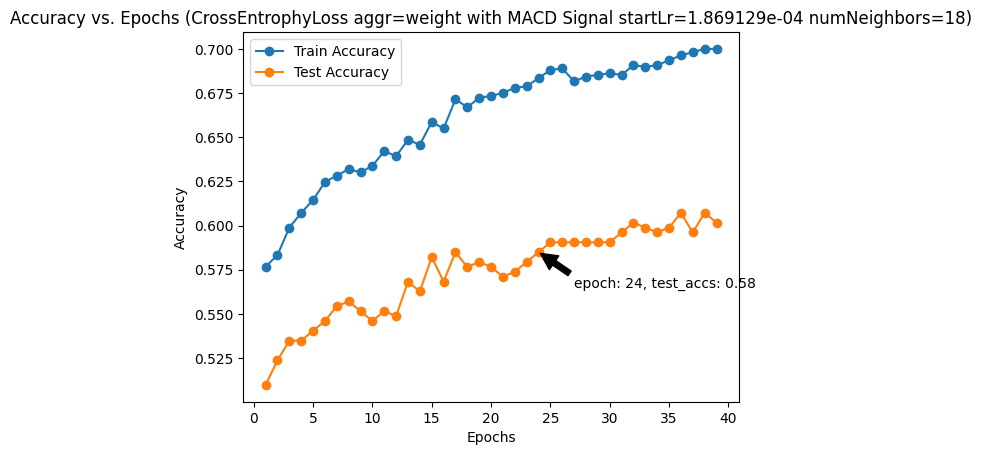

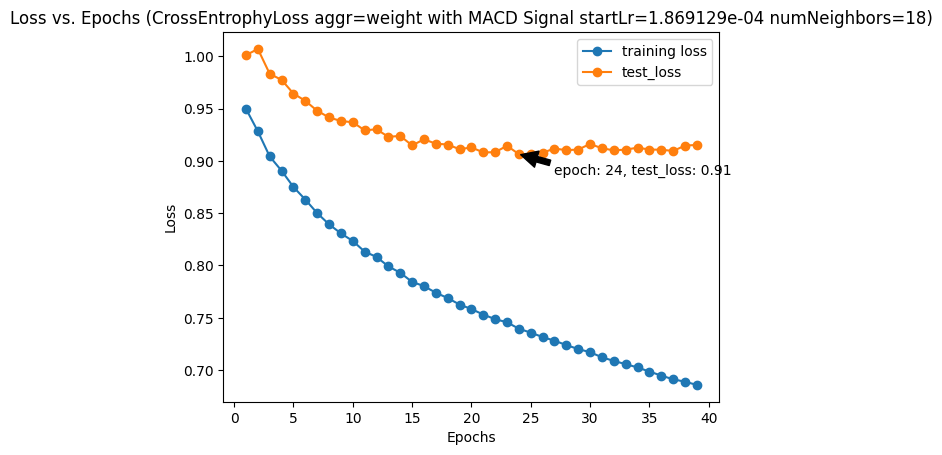

c:\Users\tony\Desktop\GNN_test\gnn_sAndp_weekly.py:221: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 640x480 with 0 Axes>

In [2]:
with_gold = False
with_oil = False
loss_function = 'CrossEntrophyLoss'
with_macd_signal = True
start_lr = 0.00018691291168759284
num_neighbors = 18
macdParamOptimize = False
gamma = 2
withAlpha = False
aggr = 'weight'
corr = 0.3
acc, loss = startGNN(start_lr, with_gold, with_oil, num_neighbors, loss_function, withMacdSignal=with_macd_signal, macdParamOptimize=macdParamOptimize, gamma=gamma, withAlpha=withAlpha, aggr=aggr, corr=corr)

In [ ]:
username = "admin"
password = "admin"
server = "127.0.0.1"
database = "OptunaPortfolioGNN"

storage_url = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

In [ ]:
#study_name='param_optimize' goPredict(start_lr, False,False, num_neighbors, 'CrossEntrophyLoss', True, macdParamOptimize, 2, True)
#study_name='GNN1' goPredict(start_lr, False,False, num_neighbors, 'CrossEntrophyLoss', False, False, 2, True)
#study_name='GNN2' goPredict(start_lr, False,False, num_neighbors, 'FocalLoss', False, False, gamma, withAlpha)
#study_name='GNN3' goPredict(start_lr, False, True, num_neighbors, 'CrossEntrophyLoss', False, False, 2, False)
#study_name='GNN4' goPredict(start_lr, True, False, num_neighbors, 'CrossEntrophyLoss', False, False, 2, False)
#study_name='GNN5' goPredict(start_lr, True, True, num_neighbors, 'CrossEntrophyLoss', False, False, 2, False)
#study_name='GNN6' goPredict(start_lr, True, True, num_neighbors, 'CrossEntrophyLoss', True, False, 2, False)
#study_name='GNN7' goPredict(start_lr, True, True, num_neighbors, 'CrossEntrophyLoss', True, True, 2, False)

In [ ]:
def goPredict(start_lr, with_gold,with_oil, num_neighbors, loss_function, with_macd_signal, macdParamOptimize, gamma, withAlpha):
    acc, loss = startGNN(start_lr, with_gold, with_oil, num_neighbors, loss_function, withMacdSignal=with_macd_signal, macdParamOptimize=macdParamOptimize, gamma=gamma, withAlpha=withAlpha)
    return loss
def objective(trial):
    start_lr = trial.suggest_float('start_lr', 1e-5, 1e-3, log=True)
    # with_gold = trial.suggest_categorical('with_gold', [True, False])
    # with_oil = trial.suggest_categorical('with_oil', [True, False])
    num_neighbors = trial.suggest_int('num_neighbors', 10, 18)
    # loss_function = trial.suggest_categorical('loss_function', ['CrossEntrophyLoss', 'FocalLoss'])
    # with_macd_signal = trial.suggest_categorical('with_macd_signal', [True, False])
    # macdParamOptimize = trial.suggest_categorical('macdParamOptimize', [True, False]) #with_macd_signal要為true才有作用
    # gamma = trial.suggest_int('gamma', 1, 5) #loss_function = FocalLoss才有用
    # withAlpha = trial.suggest_categorical('withAlpha', [True, False]) #loss_function = FocalLoss才有用
     
    loss = goPredict(start_lr, True, True, num_neighbors, 'CrossEntrophyLoss', True, True, 2, False)
    return loss



In [ ]:
study = optuna.create_study(direction='minimize', study_name='GNN7', storage=storage_url, load_if_exists=True)
study.optimize(objective, n_trials=24)

best_params = study.best_params
print("Best hyperparameters:", best_params)

In [ ]:
#study_name='GNN1' goPredict(start_lr, False,False, num_neighbors, 'CrossEntrophyLoss', False, False, 2, True)
#study_name='GNN2' goPredict(start_lr, False,False, num_neighbors, 'FocalLoss', False, False, gamma, withAlpha)
#study_name='GNN3' goPredict(start_lr, False, True, num_neighbors, 'CrossEntrophyLoss', False, False, 2, False)
#study_name='GNN4' goPredict(start_lr, True, False, num_neighbors, 'CrossEntrophyLoss', False, False, 2, False)
#study_name='GNN5' goPredict(start_lr, True, True, num_neighbors, 'CrossEntrophyLoss', False, False, 2, False)
#study_name='GNN6' goPredict(start_lr, False, False, num_neighbors, 'CrossEntrophyLoss', True, False, 2, False)
#study_name='GNN7' goPredict(start_lr, False, False, num_neighbors, 'CrossEntrophyLoss', True, True, 2, False)

goPredict(0.00023308287052684873, False,False, 13, 'CrossEntrophyLoss', False, False, 2, True) #GNN1
goPredict(0.00028935219407641655, False,False, 13, 'FocalLoss', False, False, 5, False) #GNN2
goPredict(0.00043080401342612644, False, True, 15, 'CrossEntrophyLoss', False, False, 2, False) #GNN3
goPredict(0.00023583717378475278, True, False, 13, 'CrossEntrophyLoss', False, False, 2, False) #GNN4
goPredict(0.00024545748402171694, True, True, 13, 'CrossEntrophyLoss', False, False, 2, False) #GNN5
goPredict(0.00018691291168759284, False, False, 18, 'CrossEntrophyLoss', True, False, 2, False) #GNN6

In [ ]:
load_study = optuna.load_study(study_name='GNN7', storage=storage_url)
completed_trials = [trial for trial in load_study.trials if trial.state == optuna.trial.TrialState.COMPLETE]

print(f"已經完成的trial數量: {len(completed_trials)}")

In [ ]:
load_study.best_value

In [ ]:
load_study.best_params